In [7]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import seaborn as sns

In [26]:
df = pd.read_csv('KNNData.csv')

In [19]:
df.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

In [4]:
df.shape

(1000, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


In [6]:
df.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

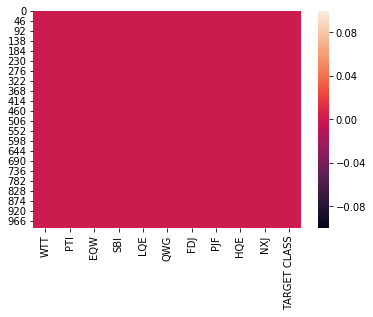

In [9]:
sns.heatmap(df.isnull())

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_1 = sc.fit_transform(df.iloc[:,:-1])

In [28]:
df_1

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784987],
       ...,
       [ 0.64177715, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602454, -0.85567   ],
       [-0.38765353, -0.59589427, -1.43139809, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [29]:
df_new = pd.DataFrame(df_1)

In [31]:
df_new['Target'] = df['TARGET CLASS']

In [33]:
df_new.head()

0         1         2         3         4         5         6  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

          7         8         9  Target  
0 -1.482368 -0.949719 -0.643314       1  
1 -0.202240 -1.828051  0.636759       0  
2  0.285707 -0.682494 -0.377850       0  
3  1.066491  1.241325 -1.026987       1  
4 -1.472352  1.040772  0.276510       1

## Normalize 

In [41]:
from sklearn.preprocessing import normalize

In [43]:
Nr = normalize(df.iloc[:,:-1])

In [44]:
Nr

array([[0.34312264, 0.43629051, 0.21323054, ..., 0.24170843, 0.33017169,
        0.46232241],
       [0.22829526, 0.36049936, 0.192275  , ..., 0.3640279 , 0.22323836,
        0.53612272],
       [0.20049913, 0.33395016, 0.25626343, ..., 0.32088406, 0.26623816,
        0.35732658],
       ...,
       [0.39254961, 0.33965253, 0.27031679, ..., 0.1346854 , 0.31777879,
        0.47899031],
       [0.32846495, 0.26091106, 0.12327193, ..., 0.32133292, 0.38676521,
        0.3597004 ],
       [0.28954384, 0.33232025, 0.14417594, ..., 0.31391936, 0.43466173,
        0.47187977]])

In [45]:
data_frame_norm = pd.DataFrame(Nr)

In [46]:
data_frame_norm.head()

0         1         2         3         4         5         6  \
0  0.343123  0.436291  0.213231  0.283633  0.293168  0.132384  0.285222   
1  0.228295  0.360499  0.192275  0.296541  0.331905  0.232899  0.242555   
2  0.200499  0.333950  0.256263  0.237809  0.424321  0.200338  0.452038   
3  0.327923  0.368447  0.173512  0.219365  0.303558  0.232518  0.374554   
4  0.382081  0.283614  0.187318  0.199770  0.368060  0.210147  0.333139   

          7         8         9  
0  0.241708  0.330172  0.462322  
1  0.364028  0.223238  0.536123  
2  0.320884  0.266238  0.357327  
3  0.366661  0.404573  0.306372  
4  0.193115  0.437123  0.423791

In [47]:
data_frame_norm['Target'] = df['TARGET CLASS']

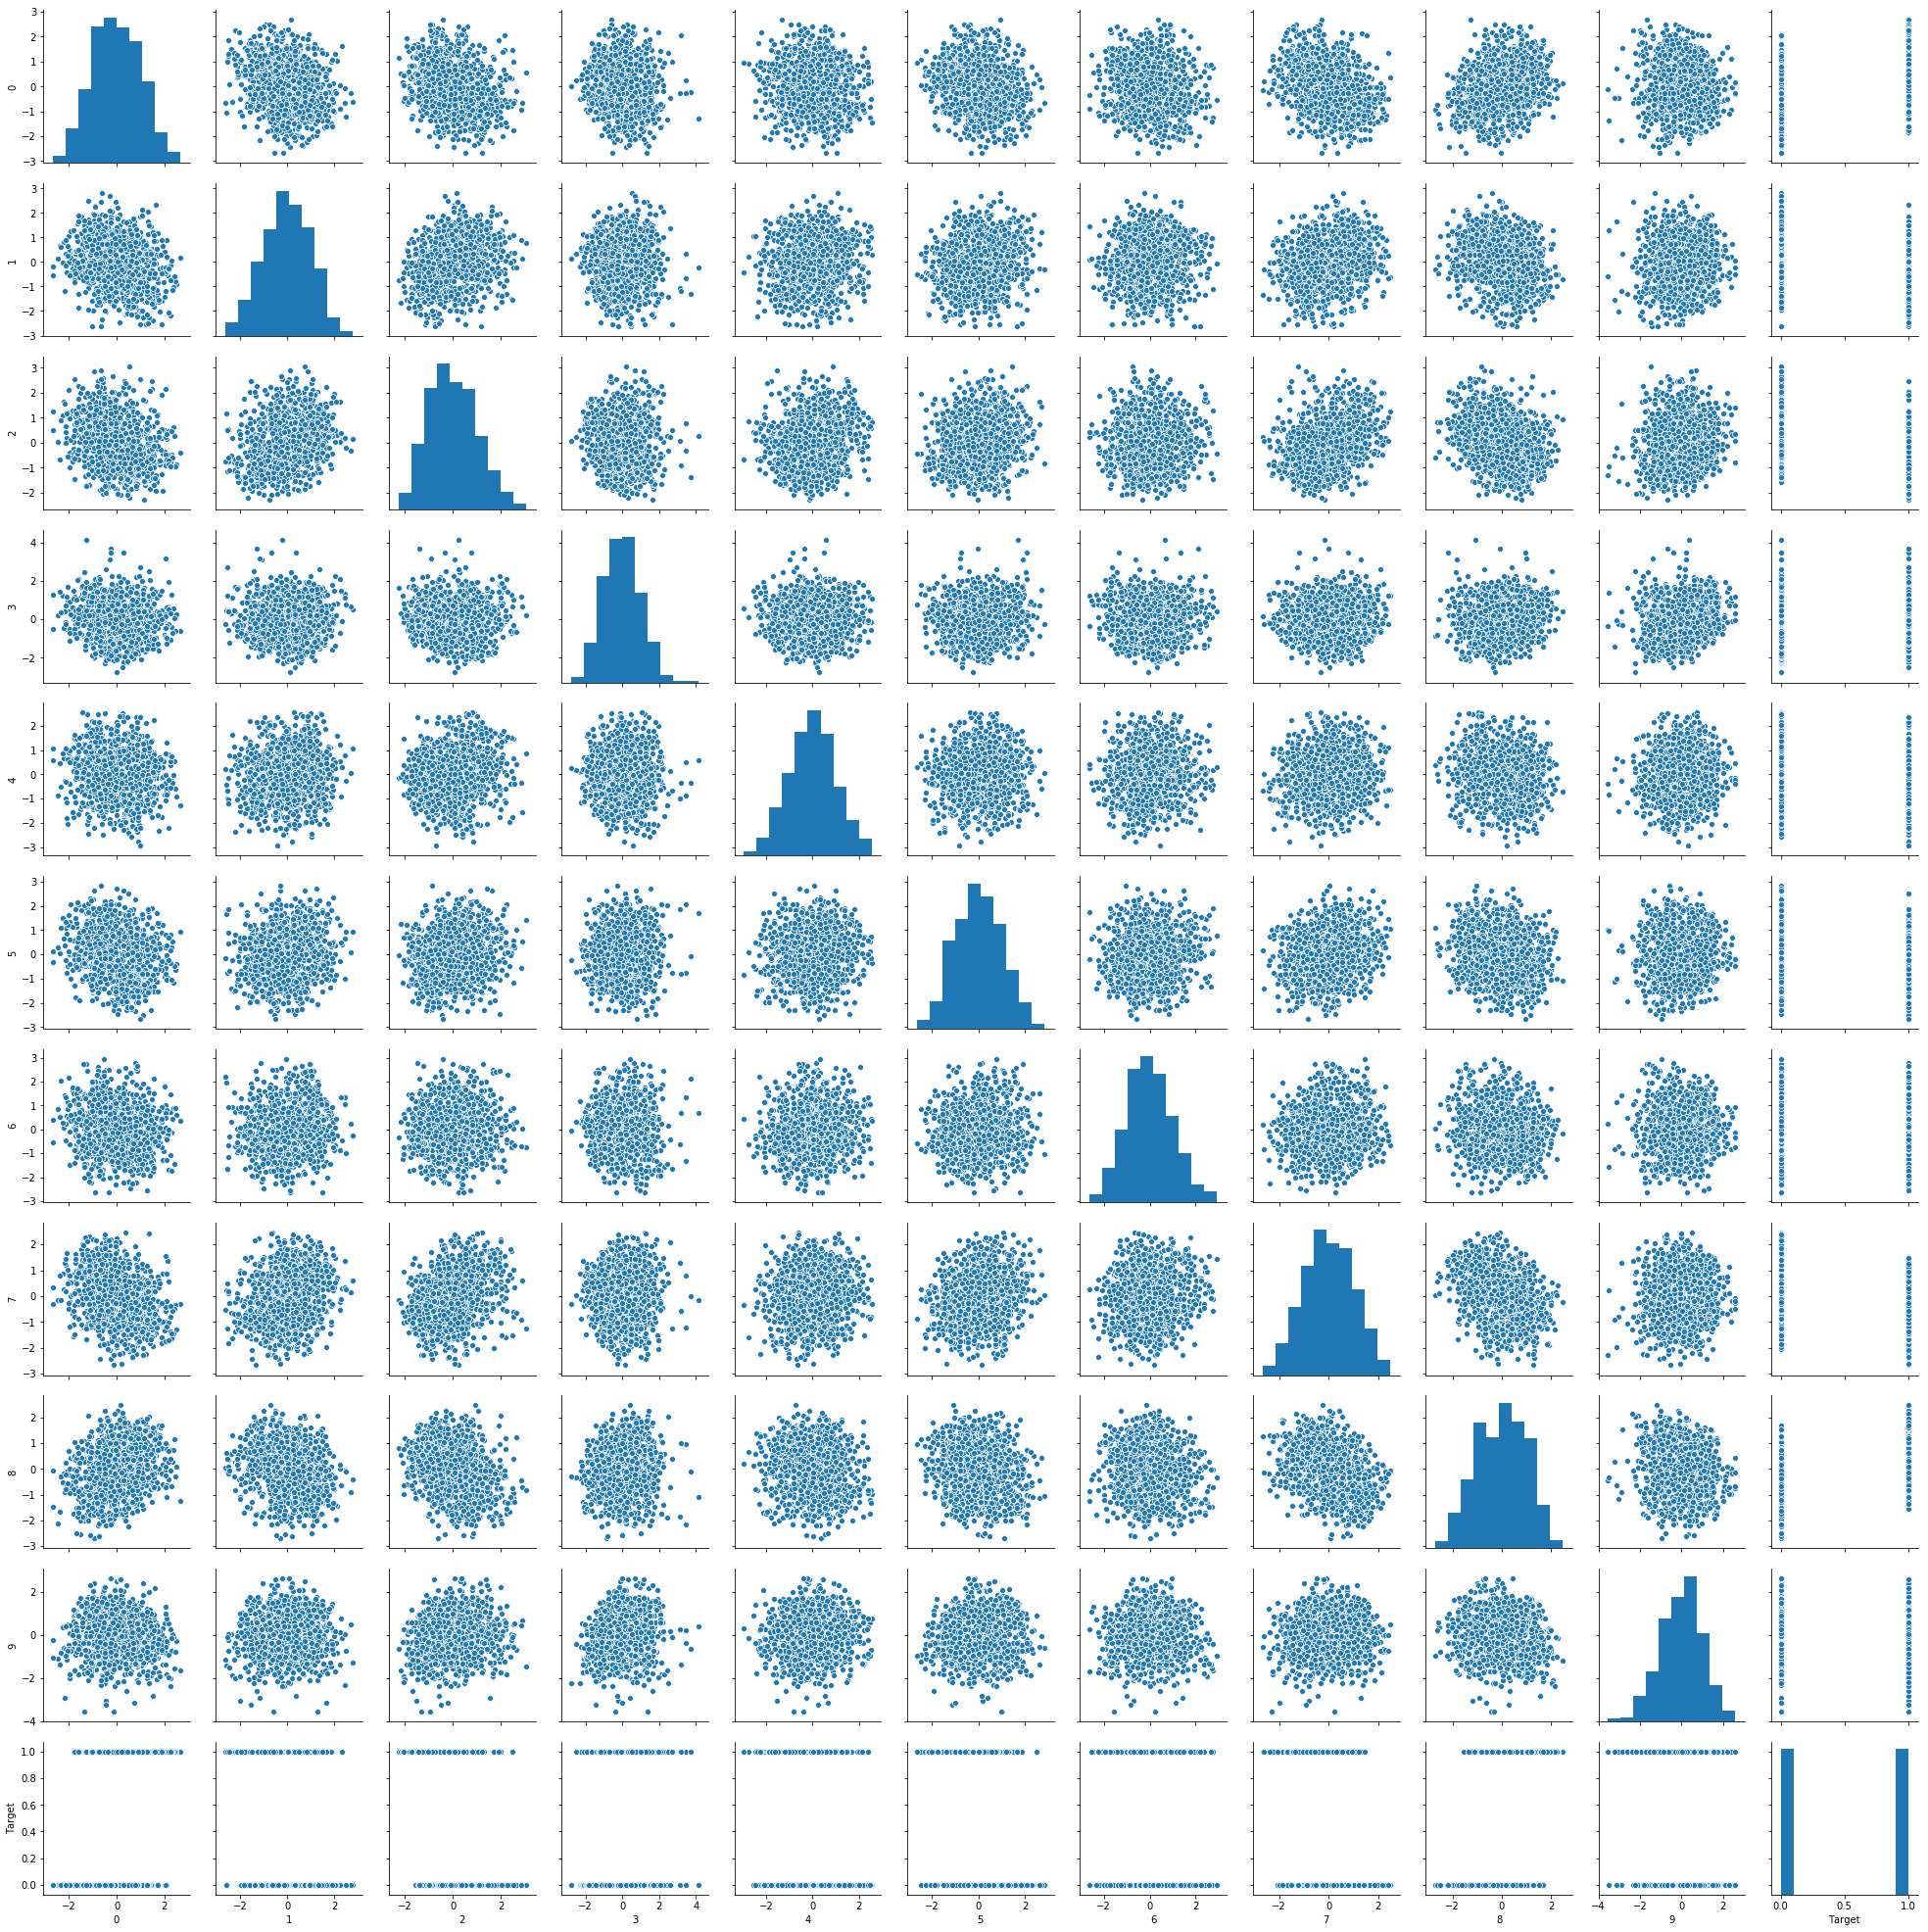

In [49]:
#standardize
sns.pairplot(df_new)

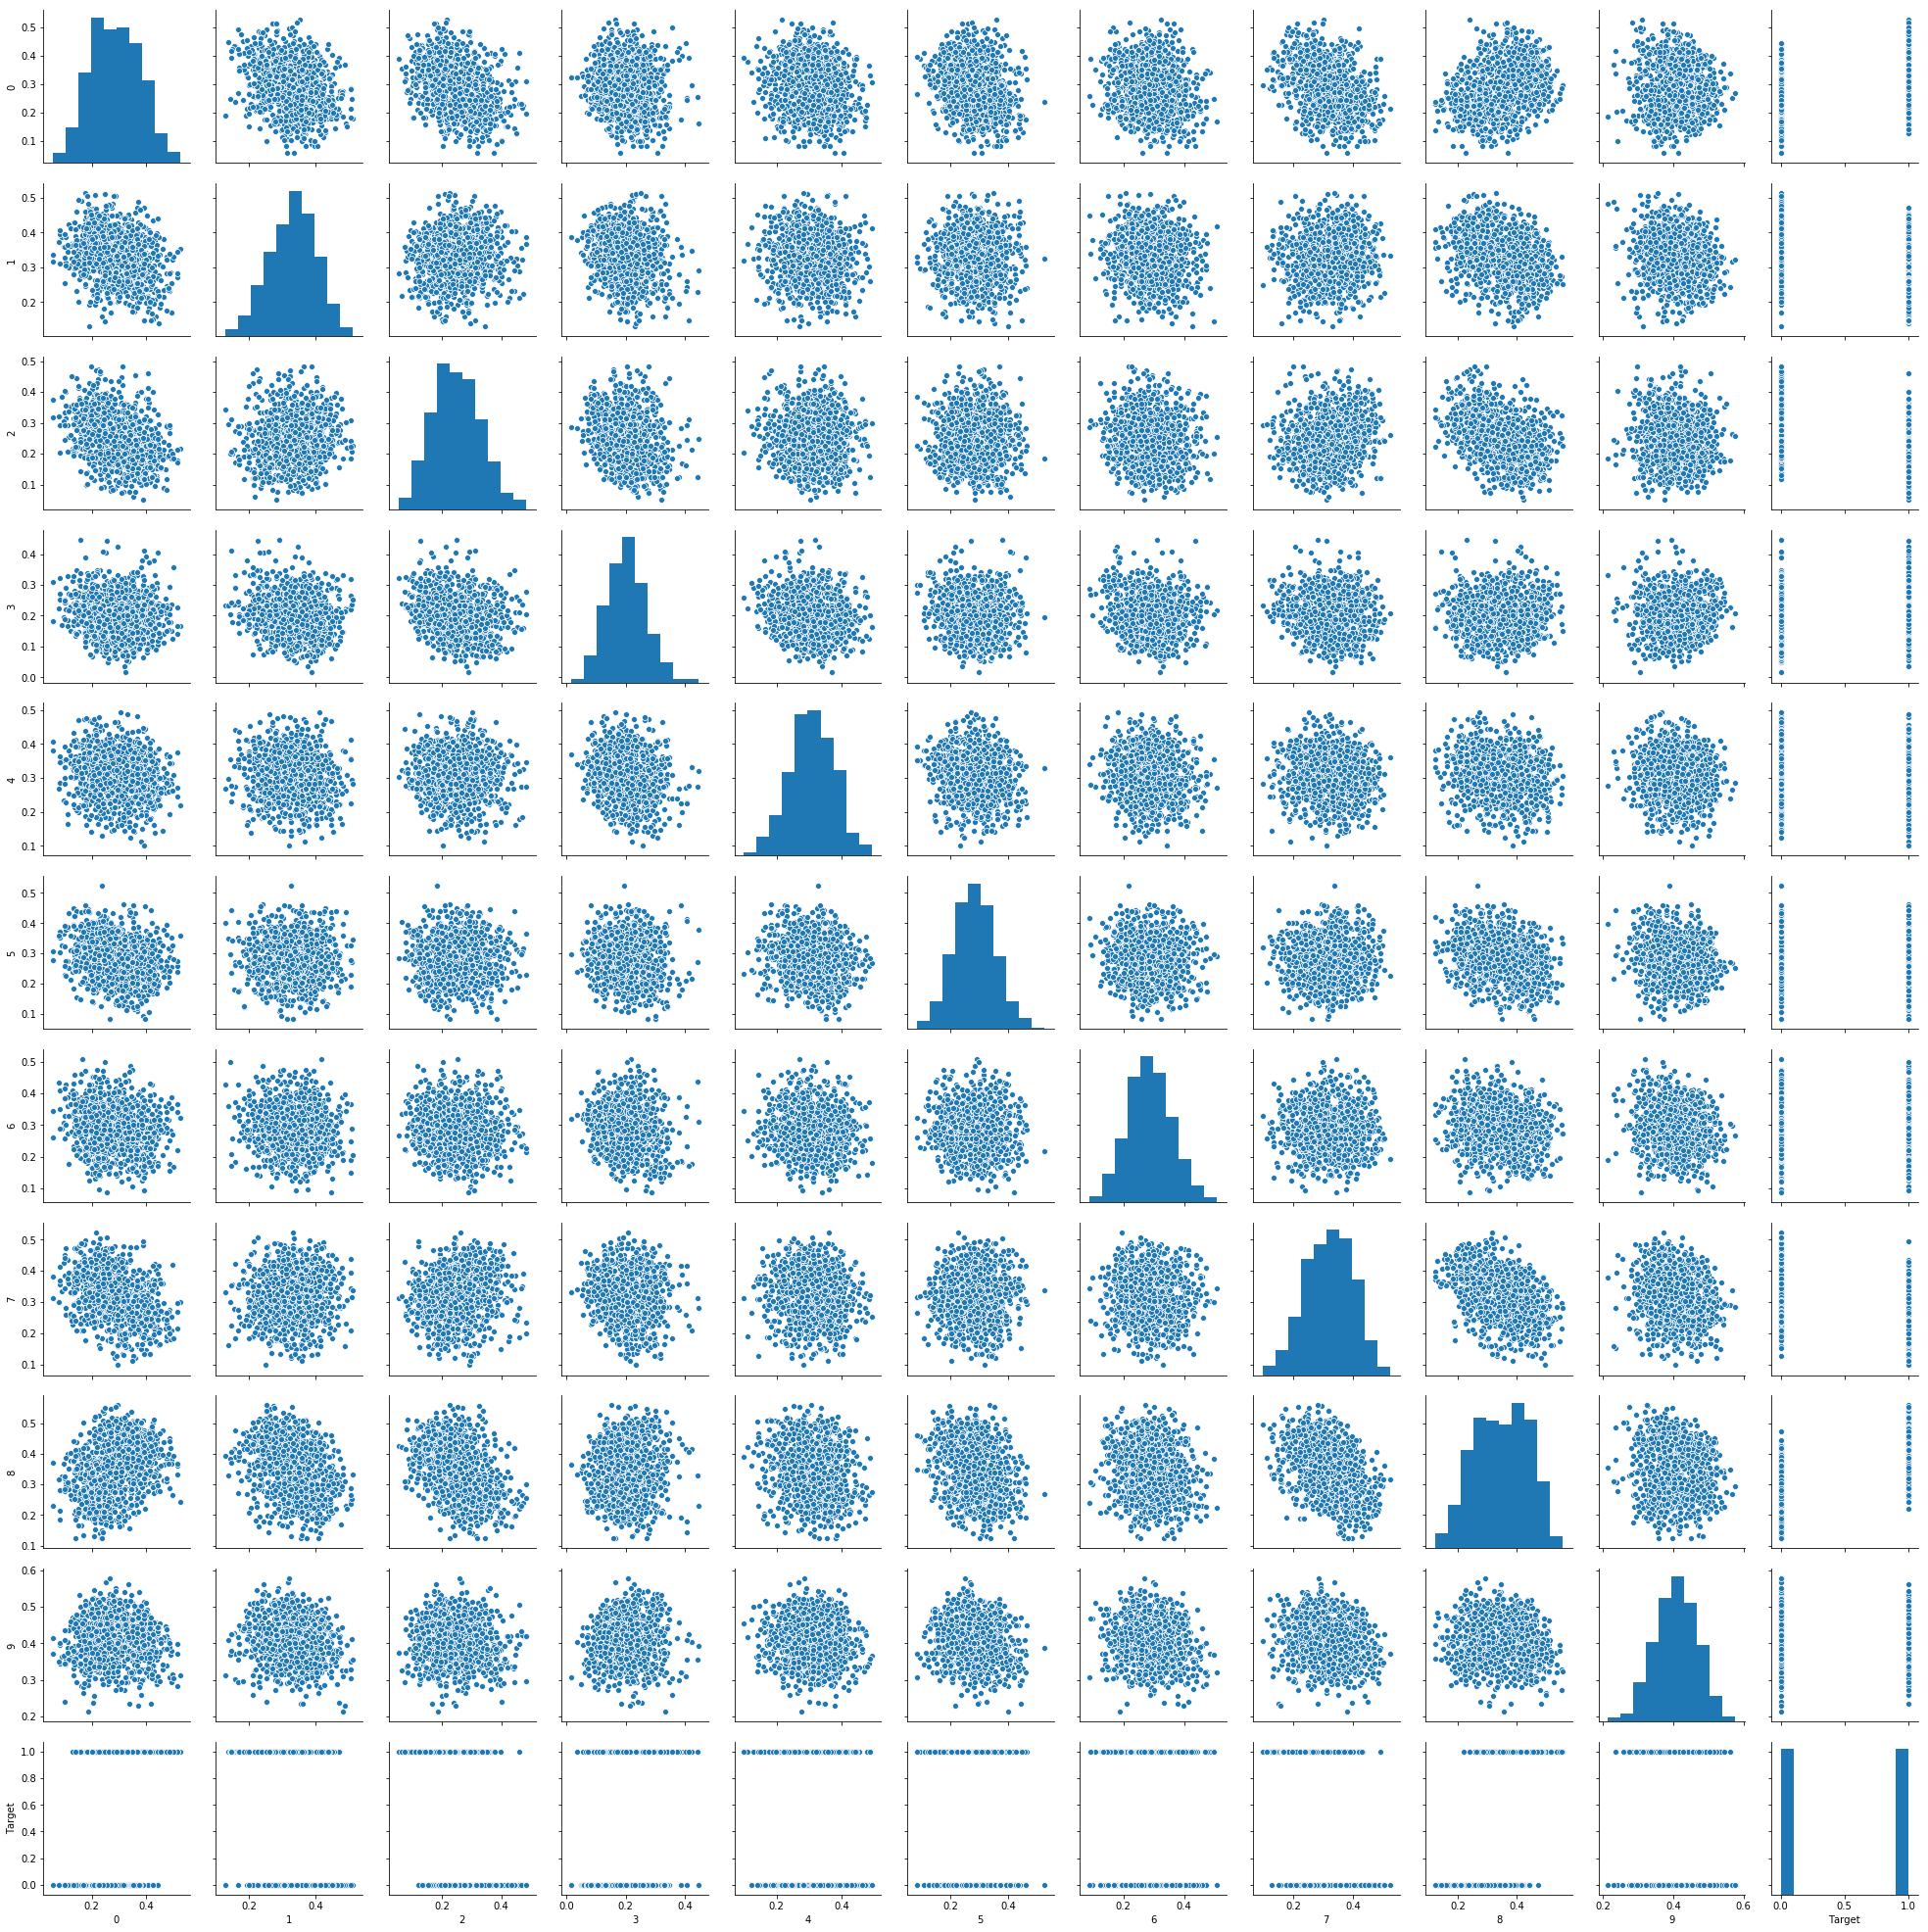

In [50]:
sns.pairplot(data_frame_norm)

In [58]:
col = df.columns[:-1]

In [64]:
df_final = pd.DataFrame(df_1,columns=col)

In [66]:
df_final['Target'] = df['TARGET CLASS']

In [68]:
df_final.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375 -0.798951   
1 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706 -1.129797   
2 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156  2.599818   
3  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220  1.750208   
4  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773  0.596782   

        PJF       HQE       NXJ  Target  
0 -1.482368 -0.949719 -0.643314       1  
1 -0.202240 -1.828051  0.636759       0  
2  0.285707 -0.682494 -0.377850       0  
3  1.066491  1.241325 -1.026987       1  
4 -1.472352  1.040772  0.276510       1

In [69]:
#standradize data 
x = df_final.iloc[:,:-1]
y= df_final.iloc[:,-1]

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

# Build the KNN model (with k =1 )

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn_1 = KNeighborsClassifier(n_neighbors=1)

In [90]:
knn_1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [91]:
knn_1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [92]:
y_pred = knn_1.predict(x_test)

In [93]:
#Metrics 
from sklearn.metrics import confusion_matrix,accuracy_score

In [94]:
con_mat = confusion_matrix(y_test,y_pred)

In [95]:
con_mat

array([[87,  9],
       [ 6, 98]], dtype=int64)

In [96]:
accuracy_score(y_test,y_pred)

0.925

# GridSearchCV 

In [97]:
from sklearn.model_selection import GridSearchCV 

In [98]:
params  = {
    'n_neighbors':[2,3,4,5,6,7,8,9,10],
    'p':[1,2]
}

In [99]:
knn_cv_model = KNeighborsClassifier()

In [100]:
#new model
model = GridSearchCV?

In [101]:
model = GridSearchCV(knn_cv_model,params,cv=5)

In [102]:
import time

In [103]:
start = time.time()
model.fit(x_train,y_train)
end = time.time()
print('Time Taken:',end - start)

Time Taken: 3.008669376373291


In [104]:
model.best_params_

{'n_neighbors': 8, 'p': 2}

In [105]:
y_pred_best = model.predict(x_test)

In [106]:
conf_mat_best = confusion_matrix(y_test,y_pred_best)

In [107]:
accuracy_best = accuracy_score(y_test,y_pred_best)

In [109]:
accuracy_best

0.94

In [110]:
conf_mat_best

array([[90,  6],
       [ 6, 98]], dtype=int64)